In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


# 就最后一步

In [30]:
import pandas as pd
import seaborn as sns
sns.set()#Set aesthetic parameters in one step.
#seaborn.set(context='notebook', style='darkgrid',
# palette='deep', font='sans-serif', font_scale=1,
# color_codes=True, rc=None)


In [31]:
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)


In [32]:
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
.astype(int)#Cast a pandas object to a specified dtype dtype.
.isin(used_networks))#Whether each element in the DataFrame is contained in values.
df = df.loc[:, used_columns]


In [33]:
#Get a set of evenly spaced colors in HUSL hue space.
network_pal = sns.husl_palette(8, s=.45)
# map() zip() dict()
network_lut = dict(zip(map(str, used_networks), network_pal))


In [34]:
# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)


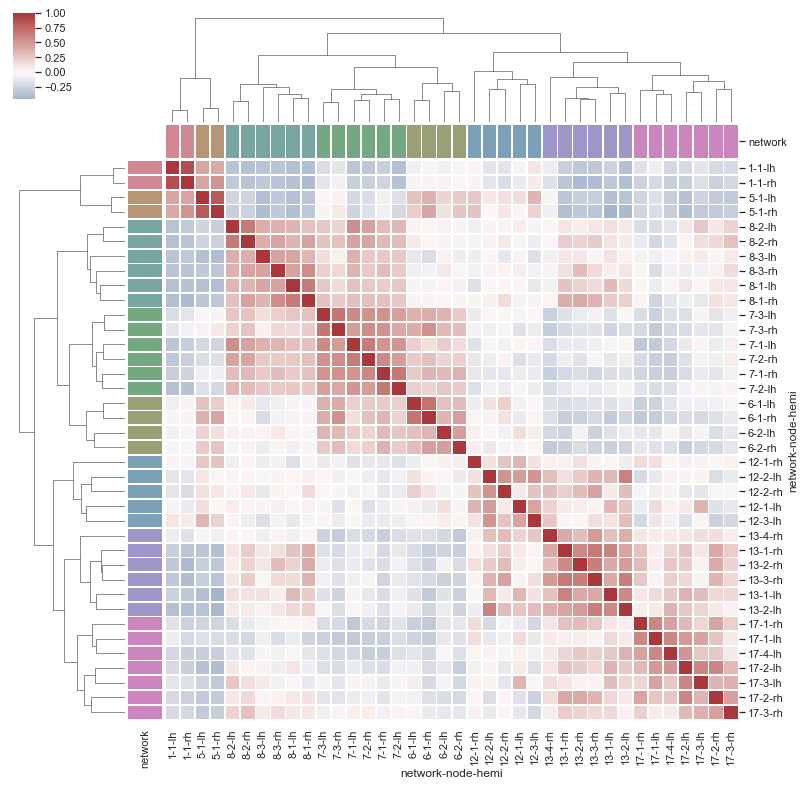

In [35]:
sns.clustermap(df.corr(), center=0, cmap="vlag",
row_colors=network_colors, col_colors=network_colors,linewidths=.75, figsize=(13, 13))
